# Part 1: Descriptive Statistics with Python
In this section, we will explore fundamental concepts of quantitative features in rectatuar date.

- Central Tendency: Mean, Median, Mode
- Dispersion: Range, IQR, Variance, STD
- Frequency Tables and Categorical Feature Summaries
- Notion of A Distribution
- Population vs Sample

## 1. Setup & Quick Review
Let's start by importing the necessary libraries and loading a dataset.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# dataset: Titanic (small and real-world)
df = pd.read_csv("https://raw.githubusercontent.com/zuilpirola/DS/refs/heads/main/Week2/titanic.csv")

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Exercise 1
- Explore the dataset with `info()`, ` describe()`and check:
  1. How many lines and columns are there?
  2. Which columns are numerical? What are categorical?

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [3]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## 2. Central trend
Let's calculate average, median and mode for some numerical variables.

In [9]:
print('Média:', df['Age'].mean())
print('Mediana:', df['Age'].median())
print('Moda:', df['Age'].mode())

Média: 29.69911764705882
Mediana: 28.0
Moda: 0    24.0
Name: Age, dtype: float64


### Exercise 2
1. Calculate the average, median and mode of the variable `Fare`.
2. Compare with the values obtained for ` Age`.
3. Note the results and discuss: Is there a significant difference between average and median? What can justify this?

In [10]:
print('Média:', df['Fare'].mean())
print('Mediana:', df['Fare'].median())
print('Moda:', df['Fare'].mode())

Média: 32.204207968574636
Mediana: 14.4542
Moda: 0    8.05
Name: Fare, dtype: float64


In [11]:
len(df) # conta numero de linhas

891

In [12]:
#Compare fare with Age
df[["Age", "Fare"]].describe()

,Age,Fare
count,714.000000,891.000000
mean,29.699118,32.204208
std,14.526497,49.693429
min,0.420000,0.000000
25%,20.125000,7.910400
50%,28.000000,14.454200
75%,38.000000,31.000000
max,80.000000,512.329200


## 3. Dispersion measurements
Dispersion measures how spread the data.

In [13]:
# Example with Age
age_range = df["Age"].max() - df["Age"].min()
age_iqr = df["Age"].quantile(0.75) - df["Age"].quantile(0.25)
age_var = df["Age"].var()
age_std = df["Age"].std()

age_range, age_iqr, age_var, age_std

(79.58, np.float64(17.875), 211.0191247463081, 14.526497332334044)

### Exercise 3
1. Calculate range, iQR, variance and standard deviation for `Fare`.
2. Compare the results of ` Age`and ` Fare`.
3. Make a histogram of each variable. Which has the greatest dispersion?

In [16]:
fare_range = df["Fare"].max() - df["Fare"].min()
fare_iqr = df["Fare"].quantile(0.75) - df["Fare"].quantile(0.25)
fare_var = df["Fare"].var()
fare_std = df["Fare"].std()

print("Fare Range:", fare_range)
print("Fare IQR:", fare_iqr)
print("Fare Variance:", fare_var)
print("Fare Standard Deviation:", fare_std)


Fare Range: 512.3292
Fare IQR: 23.0896
Fare Variance: 2469.436845743117
Fare Standard Deviation: 49.693428597180905


In [18]:
df['Age'].describe()

,Age
count,714.000000
mean,29.699118
std,14.526497
min,0.420000
25%,20.125000
50%,28.000000
75%,38.000000
max,80.000000


## 4. Distributions and frequencies
Let's explore distributions with histograms and frequencies for categorical variables.

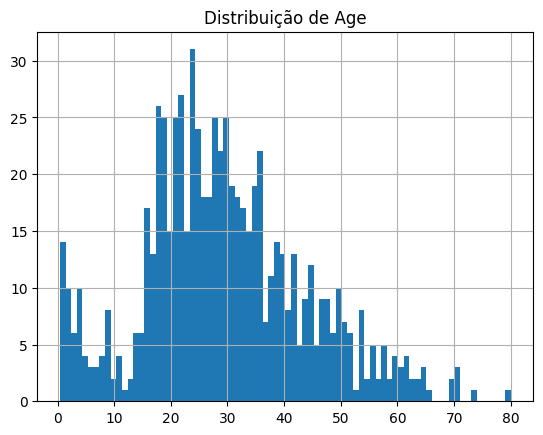

,count
Sex,
male,577
female,314


In [22]:
# Age Distribution
df['Age'].hist(bins=80)
plt.title("Distribuição de Age")
plt.show()

# Frequency per gender
df['Sex'].value_counts()

### Exercise 4
1. Make a histogram of `Fare`.
2. Create a frequency table for the variable ` Pclass`.
3. Create a Cross Table (CROSSTAB) of ` Sex`X ` Survived`.
4. Calculate the average ` Age` per ` Sex`.


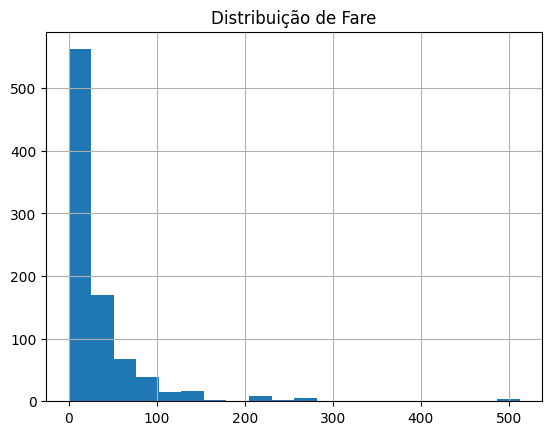

,count
Pclass,
3,491
1,216
2,184


In [24]:
df['Fare'].hist(bins=20)
plt.title("Distribuição de Fare")
plt.show()

df['Pclass'].value_counts()

In [25]:
pd.crosstab(df['Sex'], df['Survived'])

Survived,0,1
Sex,,
female,81,233
male,468,109


In [27]:
df.groupby('Sex')['Age'].mean()

,Age
Sex,
female,27.915709
male,30.726645


## 5. Population vs Sample
Let's see how statistics can vary between population and sample.

In [32]:
sample_df = df.sample(frac=0.2)

print("Média da população (Age):", df["Age"].mean())
print("Média da amostra (Age):", sample_df["Age"].mean())
print("Mediana da população:", df["Age"].median())
print("Mediana da amostra:", sample_df["Age"].median())

Média da população (Age): 29.69911764705882
Média da amostra (Age): 30.125874125874127
Mediana da população: 28.0
Mediana da amostra: 28.0


### Exercise 5
1. Create a sample of 30% of the data.
2. Compare the average and the standard deviation of `Fare` between the population and this sample.
3. Repeat the process 3 times (with `random_state` different) and note: are the results always the same?

In [36]:
sample_df = df.sample(frac=0.3)

print("Media de Fare:", df['Fare'].mean())
print("Media do Sample de Fare:", sample_df['Fare'].mean())
print("Desvio de Fare:", df['Fare'].std())
print("Desvio do Sample de Fare:", sample_df['Fare'].std())



Media de Fare: 32.204207968574636
Media do Sample de Fare: 32.35797528089888
Desvio de Fare: 49.693428597180905
Desvio do Sample de Fare: 42.88489738752512


## 6. Mini Reflection
Think and discuss in pairs:
- What really means the variable `Age` On this dataset?
- Are there limitations or contexts that we should keep in mind when analyzing it?

# Part 2: Practical Challenges

In [ ]:
import seaborn as sns

## Exercise 1
Average, median and mode `Fare` and `Age`. Then remove the 5% higher (outliers) and recalculate. What has changed?

In [ ]:
# Average, median and mode
for col in ["Fare", "Age"]:
    print(f"{col}: mean={df[col].mean():.2f}, median={df[col].median():.2f}, mode={df[col].mode()[0]}")

# Remove 5% higher values
df_no_outliers = df[(df["Fare"] <= df["Fare"].quantile(0.95)) & (df["Age"] <= df["Age"].quantile(0.95))]

for col in ["Fare", "Age"]:
    print(f"{col} sem outliers: mean={df_no_outliers[col].mean():.2f}, median={df_no_outliers[col].median():.2f}")

Fare: mean=32.20, median=14.45, mode=8.05
Age: mean=29.70, median=28.00, mode=24.0
Fare sem outliers: mean=24.14, median=13.93
Age sem outliers: mean=27.90, median=28.00


## Exercise 2
Compare the average `Age` between passengers who survived (`Survived=1`) and did not survive.

Survived
0    30.626179
1    28.343690
Name: Age, dtype: float64

## Exercise 3
Create a function that is called a numerical column and return Mean, Median, Mode.

{'mean': np.float64(29.69911764705882),
 'median': np.float64(28.0),
 'mode': np.float64(24.0)}

## Exercise 4
In what situation is the median better than the average on the Titanic dataset?

## Exercise 5
Calculate range, iQR, variance and standard deviation of `Age` per `Pclass`.


,min,max,std,var,range,IQR
Pclass,,,,,,
1,0.92,80.0,14.802856,219.124543,79.08,22.0
2,0.67,70.0,14.001077,196.030152,69.33,13.0
3,0.42,74.0,12.495398,156.134976,73.58,14.0


## Exercise 6
Compare dispersion (STD) of `Fare` and `Sex`.


Sex
female    57.997698
male      43.138263
Name: Fare, dtype: float64

## Exercise 7
Identify the numerical variable with the highest coefficient of variation (STD/Mean).

Parch          2.112344
SibSp          2.108464
Fare           1.543073
Survived       1.267701
PassengerId    0.577027
Age            0.489122
Pclass         0.362149
dtype: float64

## Exercise 8
Compare Boxplots of `Fare` between classes `Pclass`.


## Exercise 9
Plot Histograms of `Age` For each gender.

## Exercise 10
Cross table `Survived` X `Pclass` with line standardization.

Survived,0,1
Pclass,,
1,0.370370,0.629630
2,0.527174,0.472826
3,0.757637,0.242363


## Exercise 11
Distribution of `Embarked` percentage

Embarked
S    0.724409
C    0.188976
Q    0.086614
Name: proportion, dtype: float64

## Exercise 12
Average of `Fare` per `Embarked`


Embarked
C    59.954144
Q    13.276030
S    27.079812
Name: Fare, dtype: float64

## Exercise 13
Proportion of `Sex` within each `Pclass`


Sex,female,male
Pclass,,
1,0.435185,0.564815
2,0.413043,0.586957
3,0.293279,0.706721


## Exercise 14
5 samples of 20% and average `Age` in each

Amostra 1 mean Age: 29.59
Amostra 2 mean Age: 28.04
Amostra 3 mean Age: 29.38
Amostra 4 mean Age: 27.35
Amostra 5 mean Age: 28.46


## Exercise 15
Standard deviation of `Age` for the same samples

Amostra 1 std Age: 14.22
Amostra 2 std Age: 12.96
Amostra 3 std Age: 15.46
Amostra 4 std Age: 13.14
Amostra 5 std Age: 14.29
